In [1]:
import os
import glob

import DESutils
import GPRutils
import vK2KGPR
import plotGPR
import vK2KGPR
import vonkarmanFT as vk

import numpy as np
import astropy.units as u
import astropy.table as tb
from astropy.time import Time
import matplotlib.pyplot as plt
plt.style.use('~/GitHub/custom-matplotlib/custom.mplstyle')
import astropy.stats as stats
from scipy.signal import savgol_filter

from IPython import embed
from importlib import reload
import warnings
warnings.filterwarnings("ignore")

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
FITSfiles = sorted(glob.glob(f"/home/fortino/GPRSolutions/zone134/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/zone133/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/zone132/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/eris/GPR.??????.?RC.fits"))
print(len(FITSfiles))

343


In [3]:
%%time
AP = plotGPR.AggregatePlots(FITSfiles)
AP.calcVals()

CPU times: user 2min 20s, sys: 8.01 s, total: 2min 28s
Wall time: 3min 7s


In [4]:
def printStat(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    perc25, perc50, perc75 = np.percentile(arr, (25, 50, 75))
    print(f"{mean:.4f} ± {std:.4f} ({perc25:.4f}, {perc50:.4f}, {perc75:.4f})")

#####---------r----------#####
K Variance: 275.749
Outer Scale: 1.618
Diameter: 0.046
Wind: 0.017
Wind X: 0.022
Wind Y: 0.011
------------------------------
xi0 raw: 136.767
xi0 GPR_fC: 21.887
xi0 GPR: 14.056

#####---------i----------#####
K Variance: 260.156
Outer Scale: 1.890
Diameter: 0.027
Wind: 0.003
Wind X: -0.003
Wind Y: 0.009
------------------------------
xi0 raw: 112.745
xi0 GPR_fC: 17.859
xi0 GPR: 10.119

#####---------z----------#####
K Variance: 304.083
Outer Scale: 1.686
Diameter: 0.052
Wind: 0.010
Wind X: 0.015
Wind Y: 0.005
------------------------------
xi0 raw: 124.484
xi0 GPR_fC: 18.585
xi0 GPR: 11.575

##############################
K Variance: 280.808
Outer Scale: 1.726
Diameter: 2.525 arcmin
Wind X (magnitude only): 4.495 arcmin ± 3.978 arcmin
Wind Y (magnitude only): 2.480 arcmin ± 3.474 arcmin
Wind X: 0.699 arcmin ± 5.962 arcmin
Wind Y: 0.501 arcmin ± 4.239 arcmin
------------------------------
xi0 raw: 125.011
xi0 GPR_fC: 19.481
xi0 GPR: 11.966


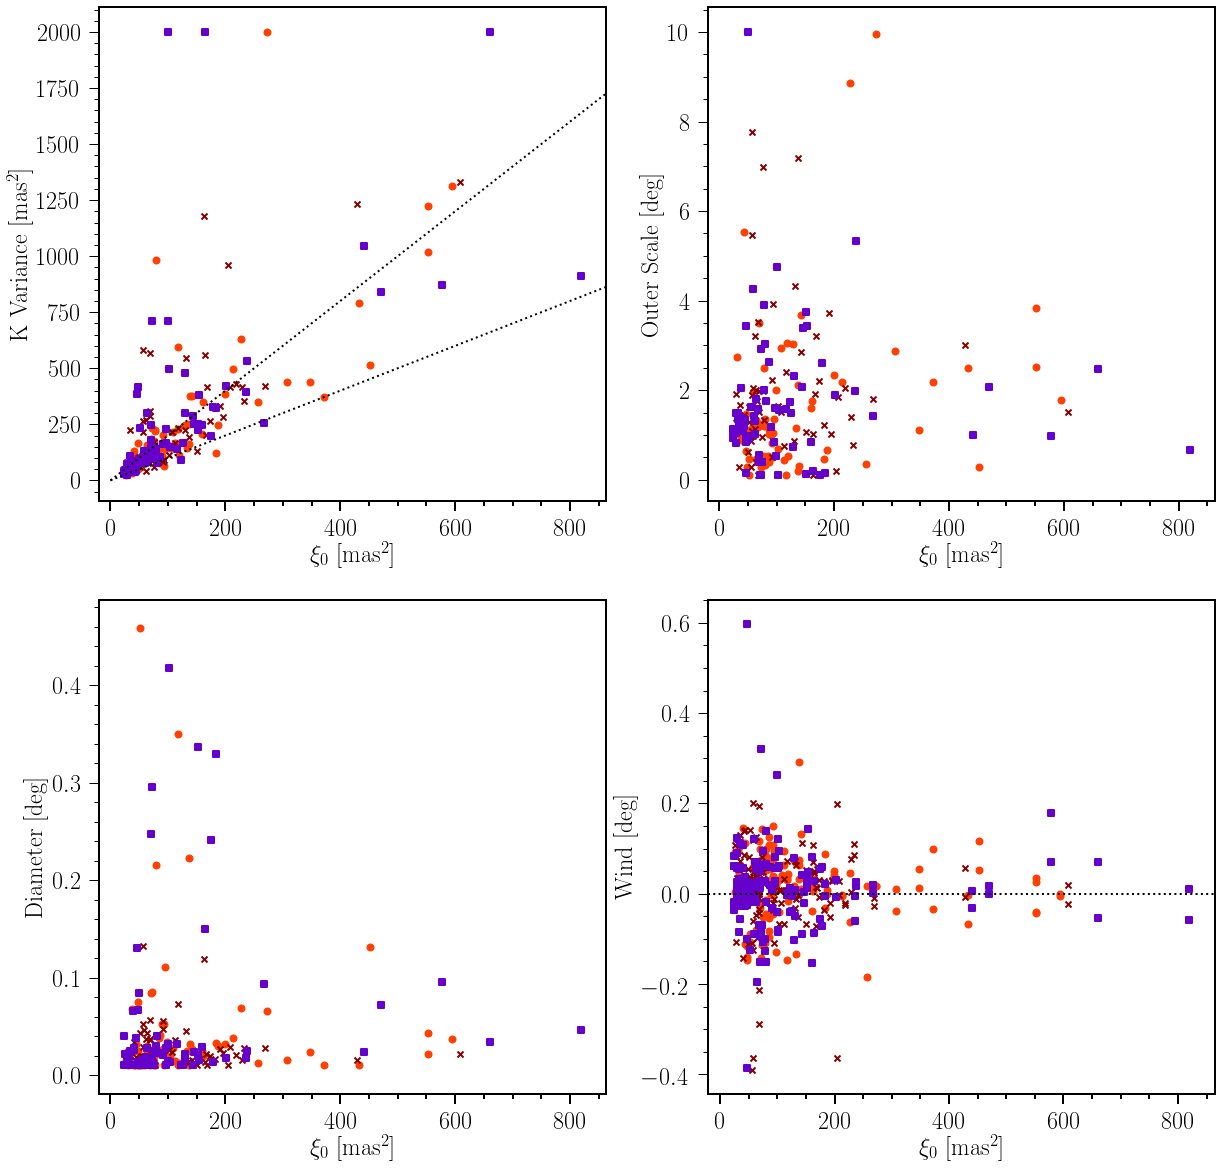

In [5]:
def params(passband, stage=None, save=None):
    
    fig, axes = plt.subplots(ncols=2, nrows=2, sharex=False, sharey=False, figsize=(20, 20))
    
    xi0_raw = []
    xi0_GPR_fC = []
    xi0_GPR = []
    
    Kvariance = []
    OuterScale = []
    Diameter = []
    Wind = []
    Wind_X = []
    Wind_Y = []
    for band in plotGPR.DES_PASSBANDS:
        if band not in passband:
            continue
            
        if not AP.expNums[band]:
            continue

        xi0_raw.extend(AP.xi0_raw[band])
        xi0_GPR_fC.extend(AP.xi0_GPR_fC[band])
        xi0_GPR.extend(AP.xi0_GPR[band])

        Kvariance.extend(AP.Kvariance[band])
        OuterScale.extend(AP.OuterScale[band])
        Diameter.extend(AP.Diameter[band])
        Wind.extend(AP.Wind_X[band])
        Wind.extend(AP.Wind_Y[band])
        Wind_X.extend(AP.Wind_X[band])
        Wind_Y.extend(AP.Wind_Y[band])
        
        if stage is None:
            raise Exception("'stage' kwarg must be 'raw', 'GPR_fC', or 'GPR'")
        if stage == "raw":
            axes[0, 0].scatter(
                AP.xi0_raw[band], AP.Kvariance[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[0, 1].scatter(
                AP.xi0_raw[band], AP.OuterScale[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 0].scatter(
                AP.xi0_raw[band], AP.Diameter[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 1].scatter(
                AP.xi0_raw[band], AP.Wind_X[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 1].scatter(
                AP.xi0_raw[band], AP.Wind_Y[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
        if stage == "GPR_fC":
            axes[0, 0].scatter(
                AP.xi0_GPR_fC[band], AP.Kvariance[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[0, 1].scatter(
                AP.xi0_GPR_fC[band], AP.OuterScale[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 0].scatter(
                AP.xi0_GPR_fC[band], AP.Diameter[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 1].scatter(
                AP.xi0_GPR_fC[band], AP.Wind_X[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 1].scatter(
                AP.xi0_GPR_fC[band], AP.Wind_Y[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
        if stage == "GPR":
            axes[0, 0].scatter(
                AP.xi0_GPR[band], AP.Kvariance[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[0, 1].scatter(
                AP.xi0_GPR[band], AP.OuterScale[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 0].scatter(
                AP.xi0_GPR[band], AP.Diameter[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 1].scatter(
                AP.xi0_GPR[band], AP.Wind_X[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            axes[1, 1].scatter(
                AP.xi0_GPR[band], AP.Wind_Y[band],
                color=plotGPR.DES_COLORS[band],
                marker=plotGPR.DES_MARKERS[band])
            
        print(f"#####{band:-^20}#####")
        print(f"K Variance: {np.mean(AP.Kvariance[band]):.3f}")
        print(f"Outer Scale: {np.mean(AP.OuterScale[band]):.3f}")
        print(f"Diameter: {np.mean(AP.Diameter[band]):.3f}")
        print(f"Wind: {np.mean(AP.Wind_X[band] + AP.Wind_Y[band]):.3f}")
        print(f"Wind X: {np.mean(AP.Wind_X[band]):.3f}")
        print(f"Wind Y: {np.mean(AP.Wind_Y[band]):.3f}")
        print("-"*30)
        print(f"xi0 raw: {np.mean(AP.xi0_raw[band]):.3f}")
        print(f"xi0 GPR_fC: {np.mean(AP.xi0_GPR_fC[band]):.3f}")
        print(f"xi0 GPR: {np.mean(AP.xi0_GPR[band]):.3f}")
        print()
    
    print("#"*30)
    print(f"K Variance: {np.mean(Kvariance):.3f}")
    print(f"Outer Scale: {np.mean(OuterScale):.3f}")
    print(f"Diameter: {(np.mean(Diameter)*u.deg).to(u.arcmin):.3f}")
#     print(f"Wind (magnitude only): {(np.mean(np.abs(Wind))*u.deg).to(u.arcmin):.3f} ± {(np.std(np.abs(Wind))*u.deg).to(u.arcmin):.3f}")
    print(f"Wind X (magnitude only): {(np.mean(np.abs(Wind_X))*u.deg).to(u.arcmin):.3f} ± {(np.std(np.abs(Wind_X))*u.deg).to(u.arcmin):.3f}")
    print(f"Wind Y (magnitude only): {(np.mean(np.abs(Wind_Y))*u.deg).to(u.arcmin):.3f} ± {(np.std(np.abs(Wind_Y))*u.deg).to(u.arcmin):.3f}")
#     print(f"Wind: {(np.mean(Wind)*u.deg).to(u.arcmin):.3f} ± {(np.std(Wind)*u.deg).to(u.arcmin):.3f}")
    print(f"Wind X: {(np.mean(Wind_X)*u.deg).to(u.arcmin):.3f} ± {(np.std(Wind_X)*u.deg).to(u.arcmin):.3f}")
    print(f"Wind Y: {(np.mean(Wind_Y)*u.deg).to(u.arcmin):.3f} ± {(np.std(Wind_Y)*u.deg).to(u.arcmin):.3f}")
    print("-"*30)
    print(f"xi0 raw: {np.mean(xi0_raw):.3f}")
    print(f"xi0 GPR_fC: {np.mean(xi0_GPR_fC):.3f}")
    print(f"xi0 GPR: {np.mean(xi0_GPR):.3f}")
    
    axes[0, 0].set_xlim((None, None))
    axes[0, 0].set_ylim((None, None))
    
    x = np.linspace(0, 1e5, 2)
    axes[0, 0].plot(x, x, "k:")
    axes[0, 0].plot(x, 2*x, "k:")
    
    axes[1, 1].axhline(y=0, c="k", ls=":")

    axes[0, 0].set_xlabel(r"$\xi_0$ [mas$^2$]")
    axes[0, 1].set_xlabel(r"$\xi_0$ [mas$^2$]")
    axes[1, 0].set_xlabel(r"$\xi_0$ [mas$^2$]")
    axes[1, 1].set_xlabel(r"$\xi_0$ [mas$^2$]")
    
    axes[0, 0].set_ylabel("K Variance [mas$^2$]")
    axes[0, 1].set_ylabel("Outer Scale [deg]")
    axes[1, 0].set_ylabel("Diameter [deg]")
    axes[1, 1].set_ylabel("Wind [deg]")
    
    if save:
        plt.savefig(save)

    plt.show()
    
params(["r", "i", "z"], stage="raw", save="/home/fortino/params.pdf")